In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt

def parse_specjvm_results(file_path):
    with open(file_path, 'r') as file:
        content = file.read()
    iterations = re.findall(r"Iteration \d+ \([\w\s]+\) result: ([\d.]+) ops/m", content)
    scores = [float(score) for score in iterations]
    average_score = np.mean(scores)
    std_dev = np.std(scores)
    return  average_score, std_dev

def plot_average_scores(file_paths):
    average_scores = []
    labels = []

    for file_path in file_paths:
        average_score,_  = parse_specjvm_results(file_path)
        average_scores.append(average_score)
        label_match = re.search(r"log2-(.*?)/", file_path)
        if label_match:
            labels.append(label_match.group(1))
        else:
            labels.append(file_path.split('/')[-2])
        
    
    num_files = len(file_paths)
    indices = np.arange(num_files)
    
    # Plot average scores
    plt.figure(figsize=(8, 5))
    plt.bar(indices, average_scores, color='blue')
    
    plt.ylabel('Average Score (ops/m)')
    plt.title('Average Score for Each File')
    plt.xticks(indices, labels, rotation=45)
    plt.show()

def plot_standard_deviations(file_paths):
    std_devs = []
    labels = []
    for file_path in file_paths:
        _, std_dev = parse_specjvm_results(file_path)
        std_devs.append(std_dev)
        label_match = re.search(r"log2-(.*?)/", file_path)
        if label_match:
            labels.append(label_match.group(1))
        else:
            labels.append(file_path.split('/')[-2])
    
    num_files = len(file_paths)
    indices = np.arange(num_files)
    
    # Plot standard deviations
    plt.figure(figsize=(8, 5))
    plt.bar(indices, std_devs, color='green')
    
    plt.ylabel('Standard Deviation (ops/m)')
    plt.title('Standard Deviation of Scores for Each File')
    plt.xticks(indices, labels, rotation=45)
    plt.show()

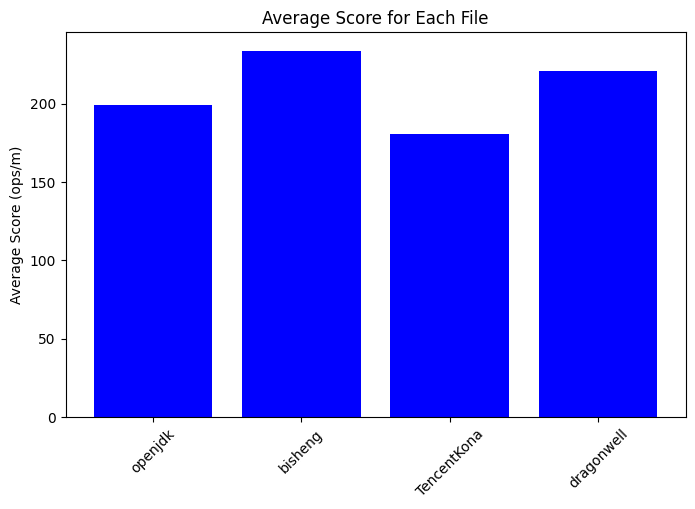

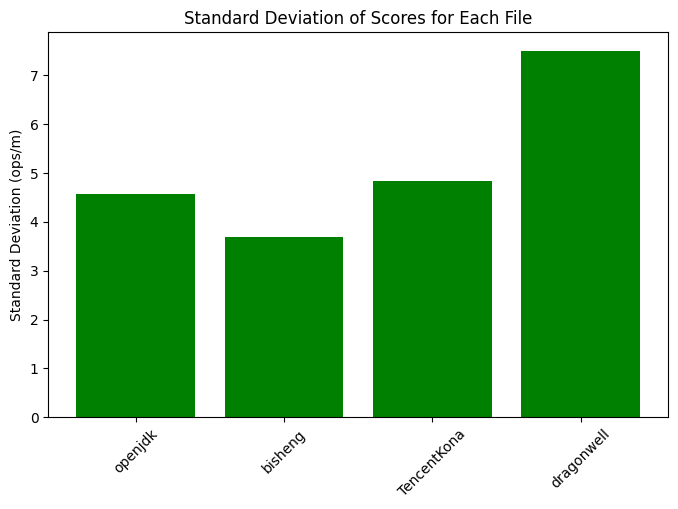

In [2]:
file_paths=['log2/log2-openjdk/SPEC.log','log2/log2-bisheng/SPEC.log',\
            'log2/log2-TencentKona/SPEC.log','log2/log2-dragonwell/SPEC.log'
            ]
plot_average_scores(file_paths)
plot_standard_deviations(file_paths)

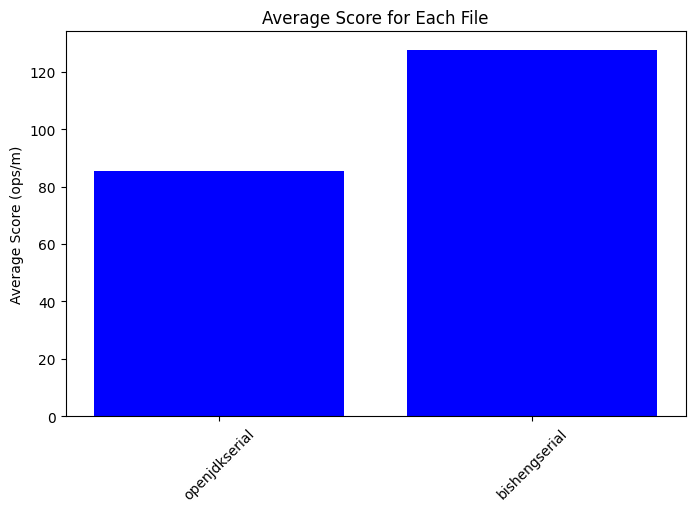

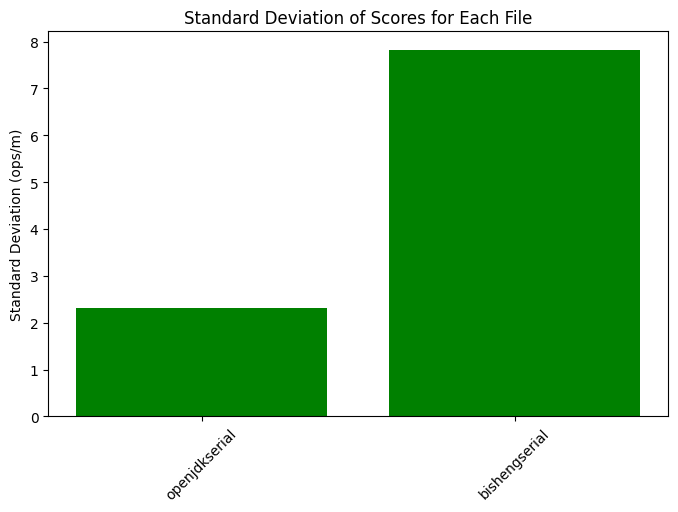

In [4]:
file_paths=['log2/log2-openjdkserial/SPEC.log','log2/log2-bishengserial/SPEC.log',\
            
            ]
plot_average_scores(file_paths)
plot_standard_deviations(file_paths)

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt

def parse_scores(file_path):
    with open(file_path, 'r') as file:
        content = file.read()
    
    scores = re.findall(r"Score on [\w.]+: ([\d.]+) ops/m", content)
    scores = [float(score) for score in scores]
    return scores

def geometric_mean(iterable):
    a = np.array(iterable)
    return a.prod()**(1.0/len(a))

def plot_geometric_mean_scores(file_paths):
    geometric_means = []
    labels = []

    for file_path in file_paths:
        scores = parse_scores(file_path)
        geo_mean = geometric_mean(scores)
        geometric_means.append(geo_mean)

        # Extract the label from the file path after 'log2-'
        label_match = re.search(r"log2-(.*?)/", file_path)
        if label_match:
            labels.append(label_match.group(1))
        else:
            labels.append(file_path)

    num_files = len(file_paths)
    indices = np.arange(num_files)

    # Plot geometric means
    plt.figure(figsize=(4, 5))
    plt.bar(indices, geometric_means)

    plt.ylabel('Geometric Mean Score (ops/m)')
    plt.title('Geometric Mean Score for Each File')
    plt.xticks(indices, labels, rotation=45)
    plt.tight_layout()
    plt.show()

    if num_files > 1:
        baseline = geometric_means[0]
        percentage_increases = [(gm - baseline) / baseline * 100 for gm in geometric_means[0:]]
        percentage_labels = labels[0:]

        indices = np.arange(len(percentage_increases))

        plt.figure(figsize=(3, 5))
        plt.bar(indices, percentage_increases)
  
        plt.ylabel('Percentage Increase (%)')

        plt.xticks(indices, percentage_labels, rotation=45)
        plt.tight_layout()
        plt.show()

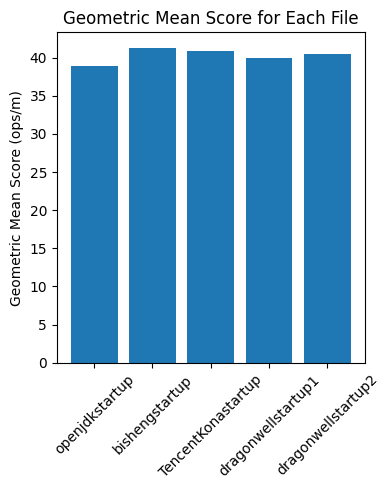

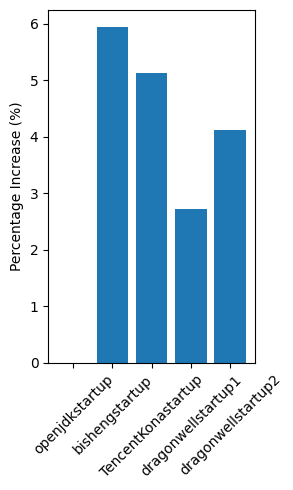

In [ ]:
# Example usage
file_paths = [
    'log2/log2-openjdkstartup/SPEC.log',
    'log2/log2-bishengstartup/SPEC.log',
    'log2/log2-TencentKonastartup/SPEC.log',
    'log2/log2-dragonwellstartup1/SPEC.log',
    'log2/log2-dragonwellstartup2/SPEC.log',
]
plot_geometric_mean_scores(file_paths)


In [35]:
from scipy import stats
import itertools
def parse_specjvm_results(file_path):
    with open(file_path, 'r') as file:
        content = file.read()
    iterations = re.findall(r"Iteration \d+ \([\w\s]+\) result: ([\d.]+) ops/m", content)
    scores = [float(score) for score in iterations]
    return scores
    
def perform_statistical_tests(file_paths):
    all_scores = []
    labels = []

    for file_path in file_paths:
        scores = parse_specjvm_results(file_path)
        all_scores.append(scores)
        label_match = re.search(r"log2-(.*?)/", file_path)
        if label_match:
            labels.append(label_match.group(1))
        else:
            labels.append(file_path.split('/')[-2])

    print(all_scores)
    print((len(all_scores)))
    # Perform t-test for the first two files as an example
    for i in range(len(all_scores)):
        for j in range(i + 1, len(all_scores)):
            t_stat, p_val = stats.ttest_ind(all_scores[i], all_scores[j])
            print(f"T-test between {labels[i]} and {labels[j]}: t-statistic = {t_stat}, p-value = {p_val}")


    # Perform ANOVA if more than two groups are present
    if len(all_scores) > 2:
        f_stat, p_val = stats.f_oneway(*all_scores)
        print(f"ANOVA test: F-statistic = {f_stat}, p-value = {p_val}")

def plot_scores_with_statistics(file_paths):
    all_scores = []
    labels = []

    for file_path in file_paths:
        scores = parse_specjvm_results(file_path)
        if len(scores) < 2:
            print(f"File {file_path} does not have enough data points for statistical testing.")
            continue
        all_scores.append(scores)
        label_match = re.search(r"log2-(.*?)/", file_path)
        if label_match:
            labels.append(label_match.group(1))
        else:
            labels.append(file_path.split('/')[-2])

    # Plot average scores with standard deviation
    avg_scores = [np.mean(scores) for scores in all_scores]
    std_devs = [np.std(scores) for scores in all_scores]
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(labels, avg_scores, yerr=std_devs, capsize=5, color='skyblue', alpha=0.7)
    ax.set_ylabel('Average Score (ops/m)')
    ax.set_title('Average Score with Standard Deviation')
    plt.xticks(rotation=45)
    
    # Perform t-test for each pair of files and annotate results
    y_max = max(avg_scores) + max(std_devs)
    for i in range(len(all_scores)):
        for j in range(i + 1, len(all_scores)):
            t_stat, p_val = stats.ttest_ind(all_scores[i], all_scores[j])
            if p_val < 0.05:
                significance = '*'
            else:
                significance = 'ns'
            plt.text((i+j)/2, y_max * 1.05, f'p={p_val:.3f} ({significance})', ha='center')

    # Perform ANOVA if more than two groups are present
    if len(all_scores) > 2:
        f_stat, p_val = stats.f_oneway(*all_scores)
        plt.text(len(labels)-1, y_max * 1.2, f'ANOVA p={p_val:.3f}', ha='center', color='red')

    plt.tight_layout()
    plt.show()

[[198.1, 203.51, 207.75, 193.71, 195.07, 197.21, 203.06, 203.05, 193.91, 196.53], [229.41, 226.65, 233.56, 237.17, 237.9, 237.24, 236.27, 230.07, 236.12, 233.7], [177.39, 183.7, 185.16, 174.61, 182.82, 185.16, 185.92, 176.74, 171.78, 183.84], [226.83, 234.18, 229.97, 217.01, 217.28, 212.44, 210.46, 224.24, 220.9, 213.83]]
4
T-test between openjdk and bisheng: t-statistic = -17.688510506516614, p-value = 7.935195297835907e-13
T-test between openjdk and TencentKona: t-statistic = 8.332820419027302, p-value = 1.364891014034084e-07
T-test between openjdk and dragonwell: t-statistic = -7.347866809983933, p-value = 8.048349169371852e-07
T-test between bisheng and TencentKona: t-statistic = 26.203769633814858, p-value = 8.691347121235008e-16
T-test between bisheng and dragonwell: t-statistic = 4.697998131666061, p-value = 0.00017923480663431198
T-test between TencentKona and dragonwell: t-statistic = -13.441793982828415, p-value = 7.957678572869155e-11
ANOVA test: F-statistic = 173.2562329091

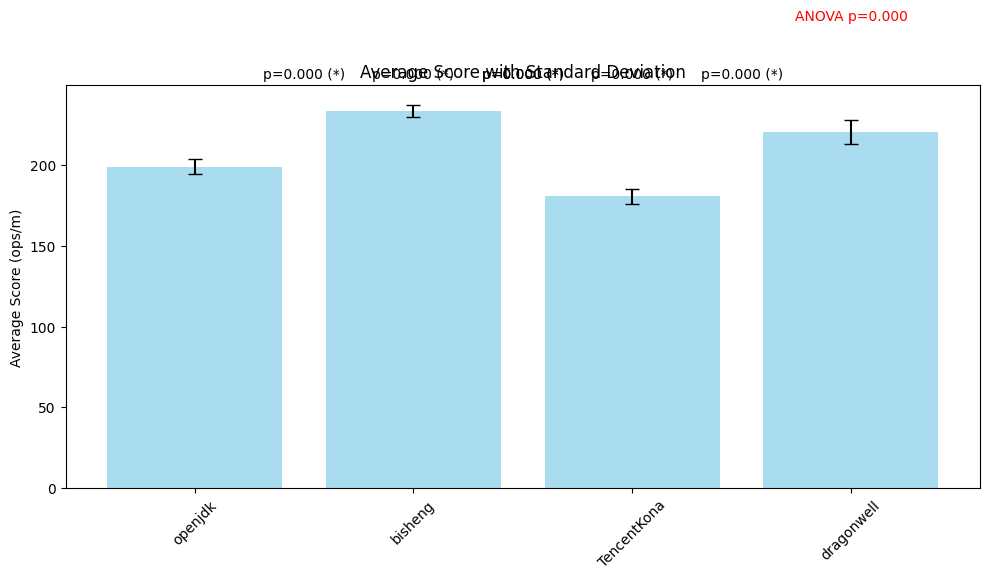

In [36]:
file_paths=['log2/log2-openjdk/SPEC.log','log2/log2-bisheng/SPEC.log',\
            'log2/log2-TencentKona/SPEC.log','log2/log2-dragonwell/SPEC.log'
            ]
perform_statistical_tests(file_paths)
plot_scores_with_statistics(file_paths)